In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def fsave(df,df_name):
    writer = pd.ExcelWriter(
        f'{df_name}.xlsx', engine='xlsxwriter')
    df.to_excel(writer,sheet_name='ft')
    writer.save()
    print(f'{df_name}.xlsx has been saved sucessfully.')
    
    

def check_miss(df):
    vars_with_missing = []
    vars_50_plus = []
    for f in df.columns:
        missings = df[f].isnull().sum()
        if missings > 0:
            vars_with_missing.append(f)
            missings_perc = missings/df.shape[0]
            
            if missings_perc > 0.5:
                vars_50_plus.append(f)
                
            #print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
    
    print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))
    print('In total, there are {} variables with more than 50% of missing values'.format(len(vars_50_plus)))
    return vars_50_plus

def imp(df):
    print(f'Importing {df} dataframe')
    df = pd.read_excel(df)
    print(f'Imported {df} dataframe')
    return df

def check_distribution(df):
    return ('\n',df.info(),'\n-Skewness:\n',df.skew(),'\n-Kurtosis\n',df.kurtosis())




In [ ]:
from sklearn.model_selection import train_test_split

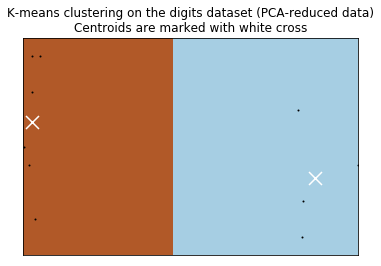

In [4]:
#Kmeans:
    
from sklearn.cluster import KMeans
                 
np.random.seed(42)

data = [1, 20, 40, 10,-20 ,10,1000,1200,980,995]
data2 = np.random.randint(-3,10,10)
#y = np.random.randint(-20,10,10)
lists = [data,data2]#,y]

h = pd.concat([pd.Series(x) for x in lists],axis=1)

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(h)

x_min, x_max = (h.iloc[:, 0].min() - 1), (h.iloc[:, 0].max() + 1)
y_min, y_max = (h.iloc[:, 1].min() - 1), (h.iloc[:, 1].max() + 1)
dd = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, dd), np.arange(y_min, y_max, dd))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(h.iloc[:, 0], h.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()